
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [60]:

import numpy as np
import matplotlib.pyplot as plt


In [61]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def __init__(self):

      self.mean=None
      self.std=None

    def fit(self, X):

      self.mean=np.mean(X,axis=0)
      self.std=np.std(X,axis=0)
      return self

    def transform(self, X):

      return (X-self.mean)/(self.std) #formula:(x-mean)/(std dev)


    def fit_transform(self, X):
      self.fit(X)
      return self.transform(X)


In [62]:
np.random.seed(42)
X_orig = 2 * np.random.rand(100, 1)
y_orig = 4 + 3 * X_orig + np.random.randn(100, 1)
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_orig)
y = y_orig.flatten()

In [63]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
      self.lr=lr
      self.epochs=epochs
      self.l2_lambda=l2_lambda
      self.wt=None
      self.bias=None
      self.loss=[]


    def fit(self, X, y):
      h,w=X.shape
      self.wt=np.zeros(w, dtype=float)
      self.bias=0.0

      y=y.flatten()

      for i in range(self.epochs):
        pred_y=np.dot(X,self.wt)+self.bias
        #Gradient Calculation
        dw = (1/h) * (np.dot(X.T, (pred_y - y)) + self.l2_lambda * self.wt)
        db = (1/h) * np.sum(pred_y - y)
        #Updation
        self.wt -= self.lr * dw
        self.bias -= self.lr * db
        #Loss Calculation
        loss= np.mean((pred_y - y)**2)
        self.loss.append(loss)

    def predict(self, X):
      return (np.dot(X, self.wt) + self.bias).flatten()


In [64]:
#Model Running
model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)

model.fit(X_scaled, y)

predictions = model.predict(X_scaled)

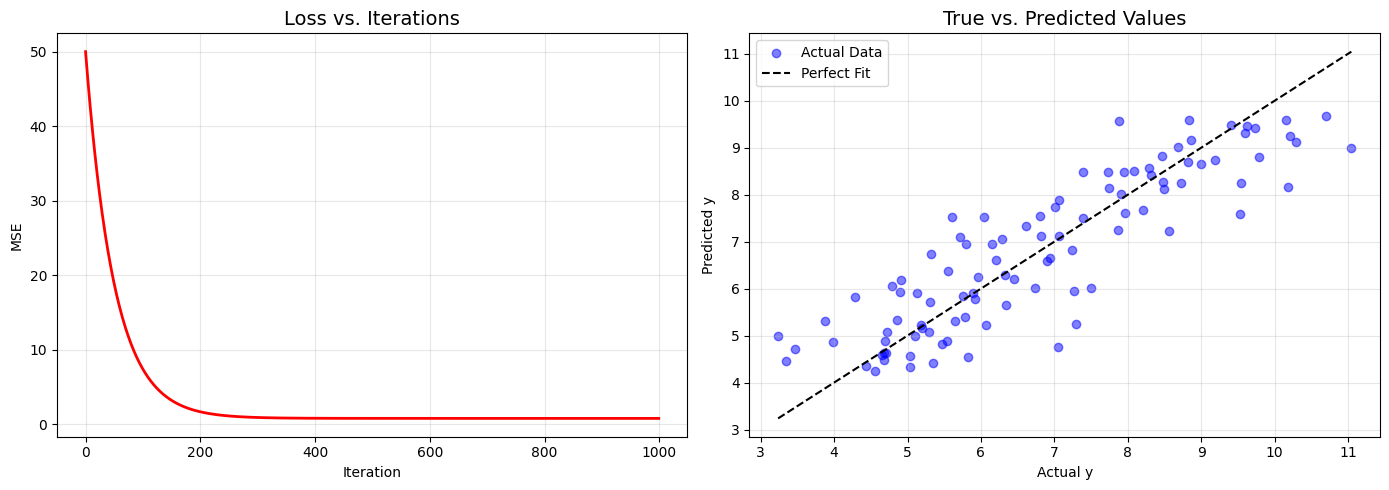

In [65]:
#plotting
plt.figure(figsize=(14, 5))

# Loss vs Iterations
plt.subplot(1, 2, 1)
plt.plot(range(len(model.loss)), model.loss, color='red', linewidth=2)
plt.title("Loss vs. Iterations", fontsize=14)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True, alpha=0.3)

# True vs Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(y, predictions, color='blue', alpha=0.5, label='Actual Data')
# Diagonal line for perfect fit reference
line_coords = [y.min(), y.max()]
plt.plot(line_coords, line_coords, color='black', linestyle='--', label='Perfect Fit')
plt.title("True vs. Predicted Values", fontsize=14)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [66]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [67]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
      self.lr=lr
      self.epochs=epochs
      self.l2_lambda=l2_lambda
      self.wt=None
      self.bias=None
      self.loss=[]

      pass

    def fit(self, X, y):
      h,w=X.shape
      self.wt=np.zeros(w, dtype=float)
      self.bias=0.0
      y=y.flatten()

      for i in range(self.epochs):
        pred_y=sigmoid(np.dot(X,self.wt)+self.bias)
        dw = (1/h) * (np.dot(X.T, (pred_y - y)) + self.l2_lambda * self.wt)
        db = (1/h) * np.sum(pred_y - y)

        self.wt -= self.lr * dw
        self.bias -= self.lr * db

        loss = -np.mean(y * np.log(pred_y) + (1 - y) * np.log(1 - pred_y))
        self.loss.append(loss)

      pass

    def predict_proba(self, X):
      z = np.dot(X, self.wt) + self.bias
      return sigmoid(z)
      pass

    def predict(self, X):
      prob = self.predict_proba(X)
      return (prob >= 0.5).astype(int)
      pass


Final Training Accuracy: 76.00%


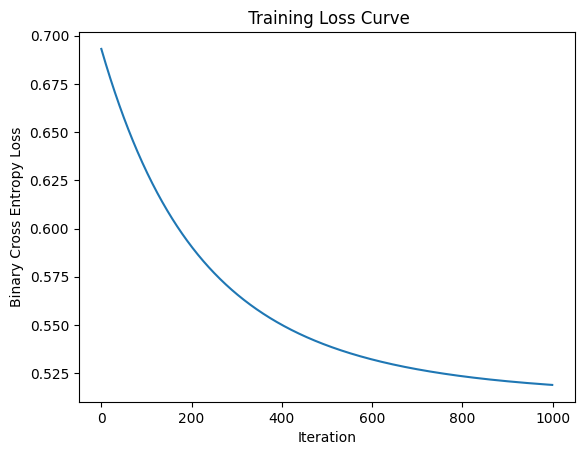

In [68]:
scaler=StandardScalerManual()
X_scaled=scaler.fit_transform(X_orig)
noise = np.random.normal(0, 1.5, size=y.shape)
y2=y+noise

y_log = (y2 > np.mean(y2) ).astype(int).flatten()

model=LogisticRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y_log)

y_pred_final = model.predict(X_scaled)
accuracy = np.mean(y_pred_final == y_log.flatten()) * 100

print(f"Final Training Accuracy: {accuracy:.2f}%")

# 4. Plot Training Loss Curve
plt.plot(model.loss)
plt.title(" Training Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Binary Cross Entropy Loss")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [69]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
from sklearn.cluster import KMeans
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    h,w=M.shape
    d=M.flatten().reshape(-1,1)

    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(d)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_.flatten()

    assignment_table = labels.reshape(h, w)

    cookbook = {i: [] for i in range(k)}
    for r in range(h):
        for c in range(w):
            cluster_idx = assignment_table[r, c]
            cookbook[cluster_idx].append((r, c))


    return assignment_table, cookbook, centroids






In [70]:
#example
h,w = 5, 5
M = np.random.rand(h, w)
k = 3

assignment_table, cookbook, centroids = kmeans_matrix(M, k)

print(centroids)
print(assignment_table)
print(cookbook)

[0.54534514 0.09891115 0.90126334]
[[1 0 1 0 2]
 [0 0 0 0 0]
 [2 0 2 2 1]
 [1 1 1 1 0]
 [1 1 2 1 2]]
{0: [(0, 1), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (3, 4)], 1: [(0, 0), (0, 2), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (4, 0), (4, 1), (4, 3)], 2: [(0, 4), (2, 0), (2, 2), (2, 3), (4, 2), (4, 4)]}



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
